<a href="https://colab.research.google.com/github/Liz-cloud/CSCM85_Coursework/blob/main/2216686_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4.1 – Multiclass SVM for Wine Data**

[1 0 1 2 1 0 2 1 1 1 1 1 0 0 0 1 2 2 1 1 0 1 2 2 1 2 1 1 0 1 2 0 2 0 1 0]
1.0


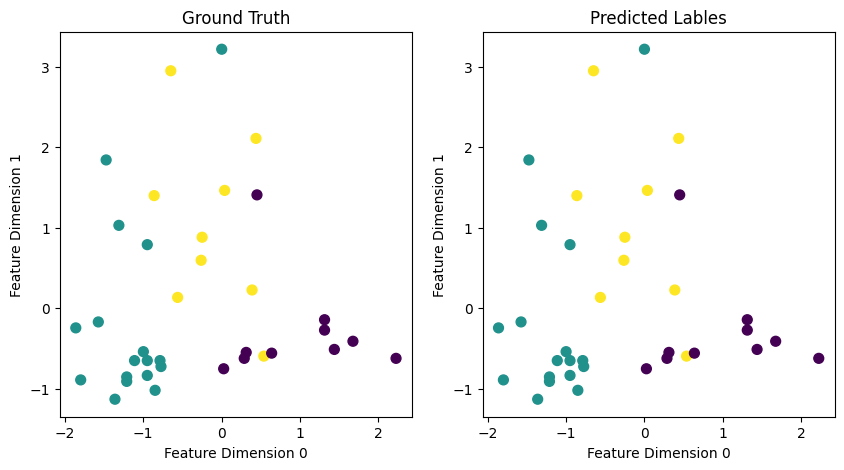

In [ ]:
# import numpy
import numpy as np
# import plt from matplotlib
import matplotlib.pyplot as plt

# load wine dataset
dataset= np.load('wineData.npy')
#load wine labels
labels= np.load('wineLabels.npy')

# divide the dataset into testing and and training data
# using the 80, 20 rule
from sklearn.model_selection import train_test_split
# 20% percent of the dataset will be allocated to the test set and 80% percent will be allocated to the training set.
train, test,train_lab,test_lab= train_test_split(dataset,labels,test_size=0.20)
# print(train[:,1].shape)
# print(train[:,0].shape)

# import StandardScaler class used to standardise the data
from sklearn.preprocessing import StandardScaler
# create a standar scaler object
scaler_obj = StandardScaler()
# fit the StandardScaler to the training data
scaler_obj.fit(train)
# transform both testing and training data
transf_test=scaler_obj.transform(test)
transf_train=scaler_obj.transform(train)

# import SVC object
from sklearn.svm import SVC
# create and training multiclass SVM on the training set
svc = SVC(gamma='auto')
# create an instance of SVC class by call its fit method
svc.fit(transf_train,train_lab)

# predit labels for the testing set
predictions=svc.predict(transf_test)
print(predictions)

#report accuracy of model
# Return the mean accuracy on the given test data and labels.
score=svc.score(transf_test,test_lab,sample_weight=None)
print(score)

#  Visualise the test data using a scatter plot
# Colour the markers with the ground truth labels from the dataset.
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(transf_test[:, 0], transf_test[:, 1], c=test_lab,s=50,cmap='viridis')
plt.title("Ground Truth")
plt.xlabel("Feature Dimension 0")
plt.ylabel("Feature Dimension 1")

# visualise the test data,
# but this time colour the markers by predicted class label
plt.subplot(122)
plt.scatter(transf_test[:, 0], transf_test[:, 1], c=predictions,s=50,cmap='viridis')
plt.title("Predicted Lables")
plt.xlabel("Feature Dimension 0")
plt.ylabel("Feature Dimension 1")
plt.show()


# **Task 4.2 – Neural Network for Wine Data**

**Create a train a Tensorflow Fully Connected Neural Network on training set (i.e,transf_train)**
Sequential allows us to pass in a list of the layers we would like to apply, in the order we wish to apply them. This is an easy way to build very simple networks, where one layer is sequentially called on the outputs of the previous layer. Here we create an instance of the `Sequential` class, passing the constructor a list of the layers we wish to use. These layers are all implemented within `tensorflow.keras.layers`. For this example, we only use `Dense` layers, which is a fully connected layer. As we can see, each layer in the list is actually a constructor call, creating their own instance of a `Dense` object/layer in our model. This example creates a neural network with 2 hidden layers (with sizes 4 and 10 respectively),and an output layer of size `len(np.unique(train_lab))` (our number of classes in the dataset). In this example, the `Dense` layers takes as input to its constructor call:the number of units/neurons, and the activation function we wish to apply to the layer's output before it is fed to the next layer in the list.

In [ ]:
# import the tensor flow
# A Sequential model is appropriate for a plain stack of layers where each layer
# has exactly one input tensor and one output tensor.
import tensorflow as tf
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(train_lab)), activation=tf.nn.softmax)])


**Now we need to compile our model**

By providing it with an optimiser, loss and metrics to train with by calling the `compile()` method of our Sequential model object then passing in values for the arguments `optimizer`, `loss`, and `metrics`. Then save the returned `tensorflow.keras.callbacks.History` into an object

* `loss` is an instance of a `tensorflow.keras.losses` class,and describes the loss to be used by the optimiser when training. In this example we use Sparse Categorical Cross-entropy, as our targets are class labels (i.e. not one-hot encoded)
* `metric` is an instance of a `tensorflow.keras.metrics` class,and describes the accuracy metric we wish to calculate between our predictions and the ground truth. In this example we use Sparse Catergorical Accuracy as we want our accuracy to reflect the proportion of samples labelled correctly.

* `optimizer`is an instance of a `tensorflow.keras.optimizers` class, and describes the optimization strategy used during the training of the model.

1.   Stochastic Gradient Descent
2.   Adadelta optimization - is a stochastic gradient descent method that is based on adaptive learning rate per dimension to address two drawbacks:
*   The continual decay of learning rates throughout training.
*   The need for a manually selected global learning rate.
3. Adam optimization -> is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

In [ ]:

# Epoch 100/100 4/4 [==] - 0s 13ms/step - loss: 0.3915 - sparse_categorical_accuracy: 0.9292 - val_loss: 0.3248 - val_sparse_categorical_accuracy: 0.9655
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

# # Epoch 100/100 4/4 [=] - 0s 25ms/step - loss: 0.0290 - sparse_categorical_accuracy: 0.9912 - val_loss: 0.1089 - val_sparse_categorical_accuracy: 0.9655
# model.compile(optimizer=tf.keras.optimizers.experimental.Adadelta(
#                 learning_rate=0.001,
#                 rho=0.95,
#                 epsilon=1e-07,
#                 weight_decay=None,
#                 clipnorm=None,
#                 clipvalue=None,
#                 global_clipnorm=None,
#                 use_ema=False,
#                 ema_momentum=0.99,
#                 ema_overwrite_frequency=None,
#                 jit_compile=True,
#                 name='Adadelta'
#             ), loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=tf.keras.metrics.SparseCategoricalAccuracy())

# model.compile(optimizer=tf.keras.optimizers.Adam(
#               learning_rate=0.001,
#               beta_1=0.9,
#               beta_2=0.999,
#               epsilon=1e-07,
#               amsgrad=False,
#               weight_decay=None,
#               clipnorm=None,
#               clipvalue=None,
#               global_clipnorm=None,
#               use_ema=False,
#               ema_momentum=0.99,
#               ema_overwrite_frequency=None,
#               jit_compile=True,
#               name='Adam'
#             ), loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=tf.keras.metrics.SparseCategoricalAccuracy())

# model.compile(optimizer=tf.keras.optimizers.Optimizer(
#                 name,
#                 weight_decay=0,
#                 clipnorm=None,
#                 clipvalue=None,
#                 global_clipnorm=None,
#                 use_ema=False,
#                 ema_momentum=0.99,
#                 ema_overwrite_frequency=None,
#                 jit_compile=True
#             ), loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=tf.keras.metrics.SparseCategoricalAccuracy())



**Now we can train out model**, by calling the `fit()` function. We pass in our data (`transf_train`), target labels (`train_lab`), and a integer representing how many epochs we want to train our model to.We also pass a float value, `validation_split`,between 0.0 and 1.0 to further divide our training data into a training and validation set. The validation set is then used by the `fit()` method to evaluate how the model is progressing during training. This will help is see whether over- or under-fitting is occuring. We also set `verbose` to 1, so that we see the training progress printed to the console. The final thing we do is save the returned `tensorflow.keras.callbacks.History` object into the variable called history. This will let us view and plot the training curves later.


In [ ]:
history = model.fit(transf_train, train_lab, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 63ms/step - loss: 1.0909 - sparse_categorical_accuracy: 0.3805 - val_loss: 1.2102 - val_sparse_categorical_accuracy: 0.3103
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0755 - sparse_categorical_accuracy: 0.3982 - val_loss: 1.1942 - val_sparse_categorical_accuracy: 0.3103
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 1.0624 - sparse_categorical_accuracy: 0.3982 - val_loss: 1.1778 - val_sparse_categorical_accuracy: 0.3103
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0488 - sparse_categorical_accuracy: 0.4248 - val_loss: 1.1623 - val_sparse_categorical_accuracy: 0.2759
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 1.0358 - sparse_categorical_accuracy: 0.4248 - val_loss: 1.1487 - val_sparse_categorical_accuracy: 0.2759
Epoch 6/100
4/4 [==============================] - 0s 20ms/step - loss: 1.0239 - sparse_categorical_accuracy: 

**Predict labels for the testing set and report the accuracy of your model on the testing set. Also visualise the data using a scatter plot**
 Use the same standadised training and training testing set from task 4.1 (i.e.,transf_test ,transf_train)

2/2 [==============================] - 0s 4ms/step
Accuracy: 97.222


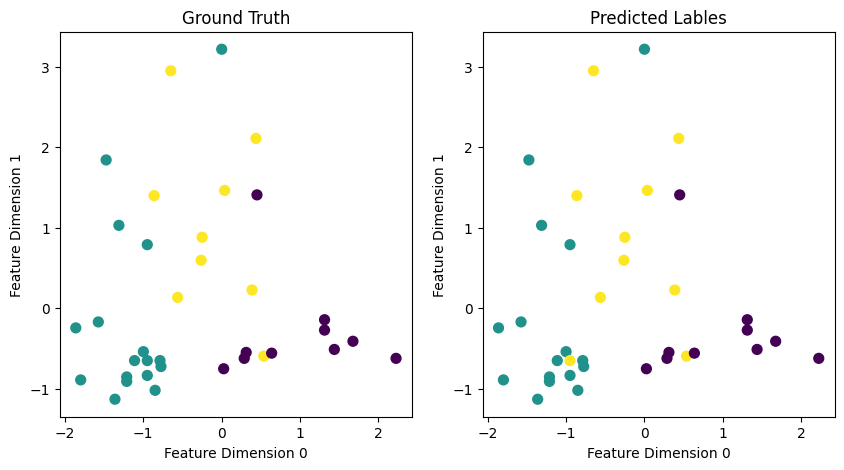

In [ ]:
# Predict labels for the testing set and report the accuracy of your model on the testing set.
from sklearn.metrics import accuracy_score
#  predit labels for the testing set
# source: https://stackoverflow.com/questions/38971293/get-class-labels-from-keras-functional-model
#  predict() function which for classification would return the class probabilities
predi=model.predict(transf_test)
# print(predi)
# You can then select the most probable classes
test_classes=predi.argmax(axis=-1)
# print(test_classes)

# #report accuracy of model
# # Return the mean accuracy on the given test data and labels.
# source: https://machinelearningmastery.com/train-to-the-test-set-in-machine-learning/
accuracy=accuracy_score(test_lab,test_classes)
print('Accuracy: %.3f' % (accuracy * 100))

#  Visualise the test data using a scatter plot
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(transf_test[:, 0], transf_test[:, 1], c=test_lab,s=50,cmap='viridis')
plt.title("Ground Truth")
plt.xlabel("Feature Dimension 0")
plt.ylabel("Feature Dimension 1")

plt.subplot(122)
plt.scatter(transf_test[:, 0], transf_test[:, 1], c=test_classes,s=50,cmap='viridis')
plt.title("Predicted Lables")
plt.xlabel("Feature Dimension 0")
plt.ylabel("Feature Dimension 1")
plt.show()

**Plotting training curves: Accuracy and Loss curves**

Here we plot two sets of training curves,the first looks at how the training and validation set accuracy behaves over the epochs trained. The second looks at the loss metric over the epochs. These plots would allow us to see where we may need to make improvements in my model. For example, if both of the accuuracy curves are still increasing, and the loss is still decreasing, then perhaps my model has not converged, and I can think about training for more epochs.If my training curves are still improving, but my validation curves have stagnated,then maybe overfitting is beginning to occur. To obtain these plots, we index into the `history.history` dictionary object, using the name of what we wish to plot as the key.

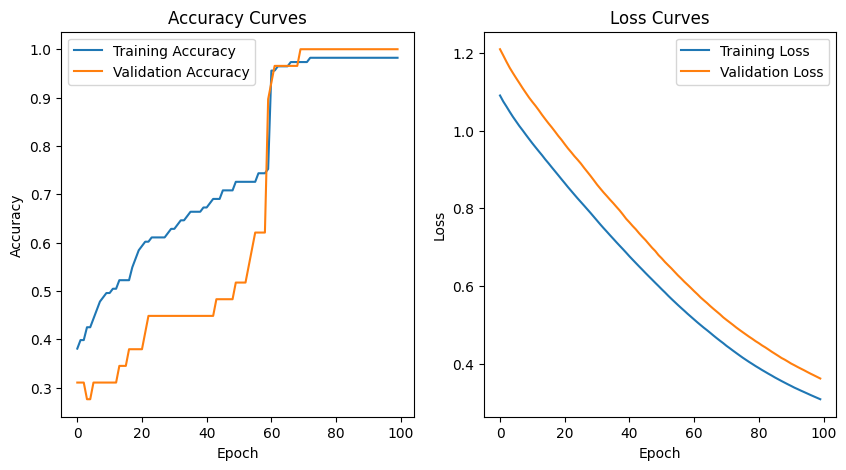

In [ ]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

# **Task 4.3 – Neural Network for Digit Recognition**

In [ ]:
# Load MNIST dataset
# load dataset into 4 variables
#  corresponding to data (x) and targets (y) for training and testing sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# need to first flatten the data so that is able to be passed into a Dense network
# source: https://www.w3schools.com/python/numpy/numpy_array_reshape.asp
print(f'MNIST sample shape: {x_train.shape[1:]}')
xtrain_flattened=x_train.reshape(60000,784)
print(f'Number of training samples: {xtrain_flattened.shape}')
xtest_flattened=x_test.reshape(10000,784)
print(f'Number of testing samples: {xtest_flattened.shape}')
# print(f'Number of classes: {len(np.unique(y_train))}')

# Normalise our data by dividing it by 255 (the maximum value in the original data)
norm_xtrain=xtrain_flattened/255.0
norm_ytest=xtest_flattened/255.0
print(norm_xtrain.shape)

# Create and train a Tensorflow Fully Connected Neural Network on the training set.
model2 = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(y_train)), activation=tf.nn.softmax)])

model2.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history2 = model2.fit(norm_xtrain, y_train, epochs=60, validation_split=0.2, verbose=1)

MNIST sample shape: (28, 28)
Number of training samples: (60000, 784)
Number of testing samples: (10000, 784)
(60000, 784)
Epoch 1/60
1500/1500 [==============================] - 7s 4ms/step - loss: 1.7285 - sparse_categorical_accuracy: 0.4087 - val_loss: 1.1133 - val_sparse_categorical_accuracy: 0.6670
Epoch 2/60
1500/1500 [==============================] - 6s 4ms/step - loss: 0.9023 - sparse_categorical_accuracy: 0.7284 - val_loss: 0.7474 - val_sparse_categorical_accuracy: 0.7759
Epoch 3/60
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6914 - sparse_categorical_accuracy: 0.7916 - val_loss: 0.5981 - val_sparse_categorical_accuracy: 0.8262
Epoch 4/60
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5924 - sparse_categorical_accuracy: 0.8258 - val_loss: 0.5410 - val_sparse_categorical_accuracy: 0.8432
Epoch 5/60
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5530 - sparse_categorical_accuracy: 0.8392 - val_loss: 0.5179 - val_spa

**Predict labels for the testing set and report the accuracy of your model on traning set**

In [ ]:
# Predict labels for the testing set and report the accuracy of your model on the testing set.
predict_lab=model2.predict(norm_ytest)
labels=predict_lab.argmax(axis=-1)
# #report accuracy of model
# Return the mean accuracy on the given test data and labels.
mean_acc=accuracy_score(y_test,labels)
print('Accuracy: %.3f' % (mean_acc * 100))

313/313 [==============================] - 1s 2ms/step
Accuracy: 87.660


**Plot your model’s training curves**

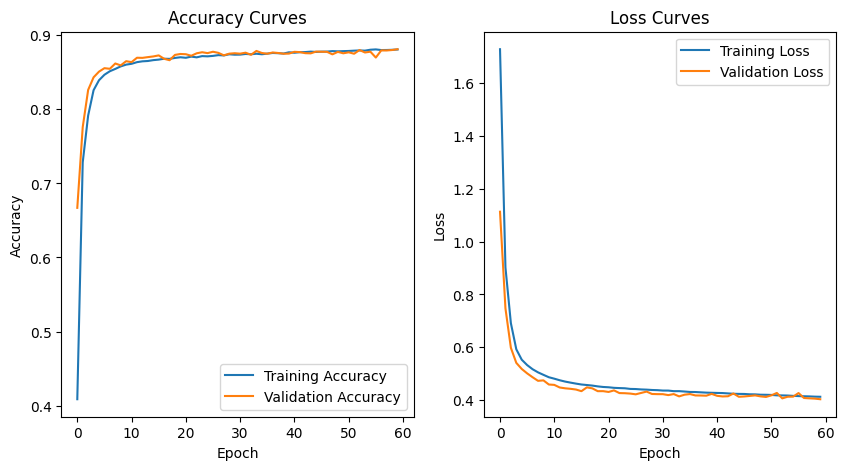

In [ ]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history2.history['sparse_categorical_accuracy'])
plt.plot(history2.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

# **Task 4.4 – Convolutional Neural Network for Digit Recognition**

1. Use the MNIST data as loaded before, with its original shape of S-H-W.
2. To use a convolutional neural network, you will need to first expand the data so that it also has a channel dimension. As our data is grayscale, we only need add an additional axis in the last dimension of our data. To do this, use np.expand dims() to make training data 60000-28-28-1, and the testing data 10000-28-28-1. *This changes the array data structure to have an additional third axis with one dimension to hold the grayscale pixel values.Where the new [channels] axis has one dimension*
3. Normalise our data by dividing it by 255 (the maximum value in the original data).
4. Create and train a Tensorflow Convolutional Neural Network on the training set. To do this, you will need to explore the API to find out about Conv2D and Pooling layers within
tensorflow.keras.layers.
5. Predict labels for the testing set and report the accuracy of your model on the testing set.
6. Plot your model’s training curves.

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_108 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 conv2d_109 (Conv2D)         (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_110 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 conv2d_111 (Conv2D)         (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 7, 7, 64)    

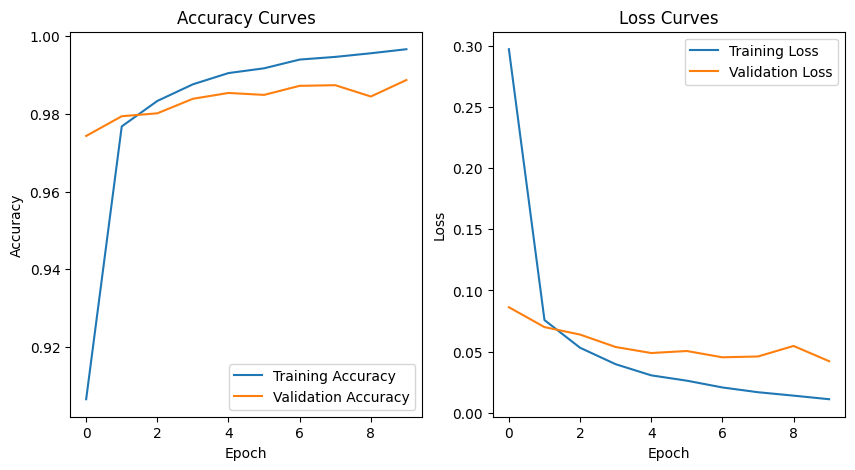

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# corresponding to data (x) and targets (y) for training and testing sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)
print(x_test.shape)

# exapand data sets by adding channels last and normalise them to pixels between 0 and 1
xtrain_expand=np.expand_dims(x_train,axis=3)/255.0
print(xtrain_expand.shape)
xtest_expand=np.expand_dims(x_test,axis=3)/255.0
print(xtest_expand.shape)

# # visualise the dataset to check if it looks correct by plotting the first 25 images
# # source: https://www.tensorflow.org/tutorials/images/cnn
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(xtrain_expand[i])
# plt.show()

# create a tensorflow convolutuional neral network
# source:https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
model3.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model3.add(tf.keras.layers.MaxPooling2D((2, 2)))
model3.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model3.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model3.add(tf.keras.layers.MaxPooling2D((2, 2)))
model3.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model3.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model3.add(tf.keras.layers.MaxPooling2D((2, 2)))
# the feature maps output from the feature extraction part of the model must be flattened
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(tf.keras.layers.Dense(10,activation='softmax'))
model3.summary()

model3.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())
# # compile and train model
# model3.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

history3 = model3.fit(xtrain_expand, y_train, epochs=10,batch_size=64,
                      validation_split=0.2,verbose=1)
# evaluate model
# Return the mean accuracy on the given test data and labels.
acc = model3.evaluate(xtest_expand, y_test, verbose=0)
print('Accuracy:',acc)

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history3.history['sparse_categorical_accuracy'])
plt.plot(history3.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

#** Challenge Task 4.5**

1. What makes a neural network a “Deep Learning” model? -> *the number of layers if it is more than 3 layers it is considered deep learning*
2. How do I make my neural network deeper? How do I make it wider? -> *add number of layers and have less number of hidden layers 1 or 2 with more number of neurons per layer*
3. How do I train my models for longer?-> *increase training data*
4. Why does running the methods numerous times result in different accuracy rates? -> *There is lots of randomness in the learning process like splitting train test data, choosing which set of data being used in each batch and so on*
5. What hyperparameters are available to our models? What happens when we alter the
penalty in the SVM or the optimisation strategy in the neural network?
